## [PCCP 모의고사 #2] 3번 - [카페 확장](https://school.programmers.co.kr/learn/courses/20848/lessons/255906)

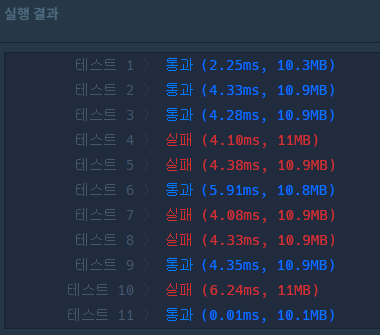

In [ ]:
def solution(menu, order, k):
    answer = 0
    
    # check할 시간 리스트업
    in_times = [k*i for i in range(len(order))]
    out_times = []
    out_time = 0
    for o in order :
        out_time += menu[o]
        out_times.append(out_time)
    
    in_times.reverse(), out_times.reverse()
    
    num_people = 0
    next_in = in_times.pop()
    next_out = out_times.pop()

    while in_times or out_times:
        if next_out == next_in:
            next_in = in_times.pop() if in_times else next_in
            next_out = out_times.pop() if out_times else next_out
            continue
        elif next_out > next_in :
            num_people += 1
            if in_times:
                next_in = in_times.pop()
            else :
                next_out = out_times.pop()
                next_in = out_times[0] if out_times else next_out
        else :
            num_people -= 1
            if out_times:
                next_out = out_times.pop()
            else :
                next_in = in_times.pop()
                next_out = in_times[0] if in_times else next_in
        if num_people > answer:
            answer = num_people        
    
    return answer

- out time을 계산할 때, 들어온 시간과 이전 메뉴 제작 종료 시간 중 늦은 시간으로 지정하는 과정을 빠뜨림
- 코드를 수정하는 김에 조금 더 간단한 코드로 업데이트

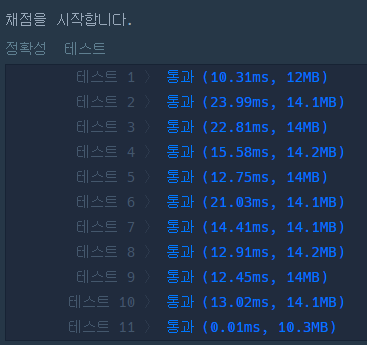

In [ ]:
def solution(menu, order, k):
    events = []
    out_time = 0
    for i, o in enumerate(order):
        out_time = max(k*i, out_time) + menu[o]
        events.append([out_time, -1])
    events += [[i*k, +1] for i in range(len(order))]
    events = sorted(events, key=lambda x:(x[0], x[1]))
    answer = 0
    cnt_people = 0
    for (time, score) in events:
        cnt_people += score
        if cnt_people > answer:
            answer = cnt_people
    
    return answer

In [ ]:
menu = [5, 12, 30]
order = [1,2,0,1]
k = 10
solution(menu, order, k)

[[0, 1], [10, 1], [12, -1], [20, 1], [30, 1], [42, -1], [47, -1], [59, -1]]


3

In [ ]:
menu = [5, 12, 30]
order = [2, 1, 0, 0, 0, 1, 0]
k = 10
solution(menu, order, k)

[[0, 1], [10, 1], [20, 1], [30, -1], [30, 1], [40, 1], [42, -1], [47, -1], [50, 1], [52, -1], [57, -1], [60, 1], [69, -1], [74, -1]]


4

In [ ]:
menu = [5]
order = [0, 0, 0, 0, 0]
k = 5
solution(menu, order, k)

[[0, 1], [5, -1], [5, 1], [10, -1], [10, 1], [15, -1], [15, 1], [20, -1], [20, 1], [25, -1]]


1

## [PCCP 모의고사 #2] 4번 - [보물 지도](https://school.programmers.co.kr/learn/courses/20848/lessons/255907)

In [ ]:
visited = {(1,1,0):3}
visited.get((1,1,0))

3

In [ ]:
visited.get((1,1,0), float('inf'))

3

In [ ]:
visited.get((1,1,1), float('inf'))

inf

- 기본적인 DFS를 적용해 구현  
: 테스트 케이스에서 런타임 에러 발생

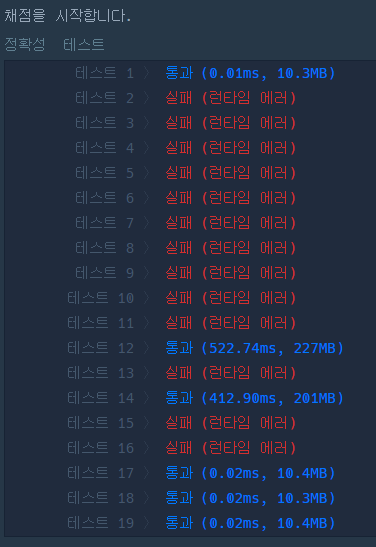

In [ ]:
def dfs(x, y, n, m, holes, used_shoes, time, visited):
    # 목적지에 도달했을 경우
    if (x, y) == (n, m):
        return time
    # 이미 방문한 위치이며, 이전에 방문했을 때보다 시간이 많거나 같으면 더 탐색할 필요 없음
    if time >= visited.get((x, y, used_shoes), float('inf')):
        return float('inf')
    visited[(x, y, used_shoes)] = time

    min_time = float('inf')
    directions = [(1, 0), (0, 1), (-1, 0), (0, -1)]
    for dx, dy in directions:
        nx, ny = x + dx, y + dy
        if 1 <= nx <= n and 1 <= ny <= m and (nx, ny) not in holes:
            min_time = min(min_time, dfs(nx, ny, n, m, holes, used_shoes, time+1, visited))
        
        # 신발을 아직 사용하지 않았다면
        if not used_shoes:
            for step in [2, -2]:
                nx, ny = x + dx*step, y + dy*step
                if 1 <= nx <= n and 1 <= ny <= m and (nx, ny) not in holes:
                    # 신발을 사용하여 두 칸 뛰어넘음
                    min_time = min(min_time, dfs(nx, ny, n, m, holes, True, time+1, visited))

    return min_time

def solution(n, m, hole):
    holes = set(map(tuple, hole))
    min_time = dfs(1, 1, n, m, holes, False, 0, {})
    return min_time if min_time != float('inf') else -1


- BFS를 이용해서 탐색하는 코드로 수정

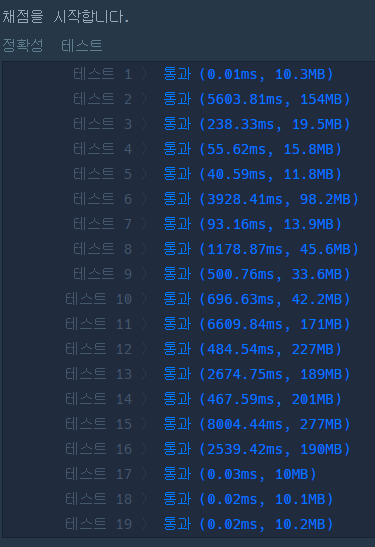

In [ ]:
from collections import deque

def solution(n, m, hole):
    holes = {(x, y) for x, y in hole}  # 함정 위치를 셋으로 변환하여 탐색 속도 개선
    visited = set()  # 방문한 위치와 신발 사용 여부를 저장하는 셋
    queue = deque([(1, 1, False, 0)])  # 시작 위치, 신발 사용 여부, 이동 시간을 큐에 추가
    
    while queue:
        x, y, used_shoes, time = queue.popleft()
        if (x, y) == (n, m):  # 목적지에 도달했다면 현재 시간을 반환
            return time
        if (x, y, used_shoes) in visited:  # 이미 방문한 상태라면 스킵
            continue
        visited.add((x, y, used_shoes))  # 현재 상태를 방문 처리
        
        for dx, dy in [(1, 0), (0, 1), (-1, 0), (0, -1)]:  # 상, 하, 좌, 우 이동
            for step in [1, 2] if not used_shoes else [1]:  # 신발을 사용하지 않았다면 2칸 이동 가능
                nx, ny = x + dx*step, y + dy*step
                if 1 <= nx <= n and 1 <= ny <= m:  # 지도 범위 내
                    if (nx, ny) in holes:  # 함정이고 한 칸 이동이라면 이동 불가
                        continue
                    queue.append((nx, ny, used_shoes or step == 2, time + 1))

    return -1  # 목적지에 도달할 수 없는 경우

In [ ]:
n = 4
m = 4
hole = [[2, 3], [3, 3]]
solution(n, m, hole)

5

깊이/너비 우선 탐색(DFS/BFS) > [타겟 넘버](https://school.programmers.co.kr/learn/courses/30/lessons/43165)

### 그냥 풀어보기
- 더하기와 빼기로 구성된 모든 조합을 사전에 구해두고, TARGET 조건을 충족하는 경우를 세기

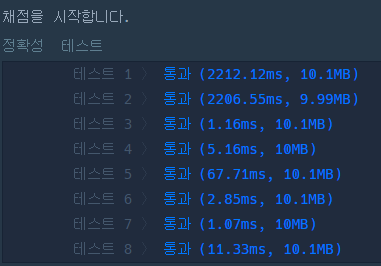

In [ ]:
from itertools import product

for combination in product([0, 1], repeat=4):
    print(''.join(map(str, combination)))

0000
0001
0010
0011
0100
0101
0110
0111
1000
1001
1010
1011
1100
1101
1110
1111


In [ ]:
from itertools import product

def solution(numbers, target):
    
    # 모든 가능한 조합을 구하고, target과 일치하면 count
    cnt = 0
    for combi in product([0,1], repeat=len(numbers)):
        value = 0
        for idx, number in enumerate(numbers):
            value += number if combi[idx]==0 else -number
        if value == target:
            cnt += 1
    return cnt

### 같은 컨셉으로 조금 더 개선
- python 내장 함수를 최대한 활용해 작성

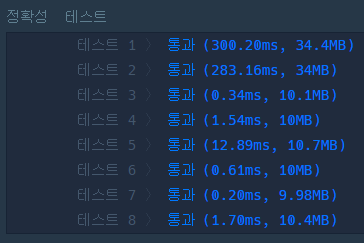

In [ ]:
from itertools import product

def solution(numbers, target):
    l = [(x, -x) for x in numbers]
    s = list(map(sum, product(*l)))
    return s.count(target)

### DFS

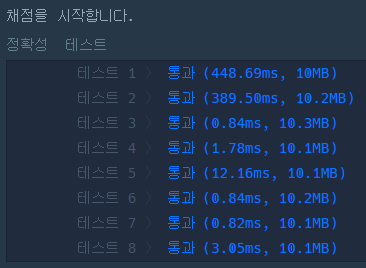

In [ ]:
def dfs(numbers, target, idx=0, current_sum=0):
    # 마지막 숫자까지 계산했을 때
    if idx == len(numbers):
        # 현재 합이 target과 동일하면 1
        if current_sum == target:
            return 1
        else :
            return 0
    return dfs(numbers, target, idx+1, current_sum + numbers[idx]) + dfs(numbers, target, idx+1, current_sum - numbers[idx])

def solution(numbers, target):
    return dfs(numbers, target)

### BFS

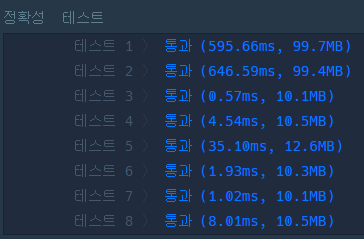

In [ ]:
from collections import deque

def solution(numbers, target):
    queue = deque([(0, 0)]) # (현재 합, idx)
    count = 0
    
    while queue:
        current_sum, idx = queue.popleft()
        
        # 모든 숫자를 다 사용했을 경우
        if idx == len(numbers):
            if current_sum == target:
                count += 1
        else :
            # 현재 숫자를 더하는 경우
            queue.append((current_sum + numbers[idx], idx+1))
            # 빼는 경우
            queue.append((current_sum - numbers[idx], idx+1))
    
    return count

## 깊이/너비 우선 탐색(DFS/BFS) > [게임 맵 최단거리](https://school.programmers.co.kr/learn/courses/30/lessons/1844)
- 일반적인 최단거리 탐색 문제
- 최단거리 탐색의 경우, BFS를 이용하는 방식이 더 효율적임

### BFS

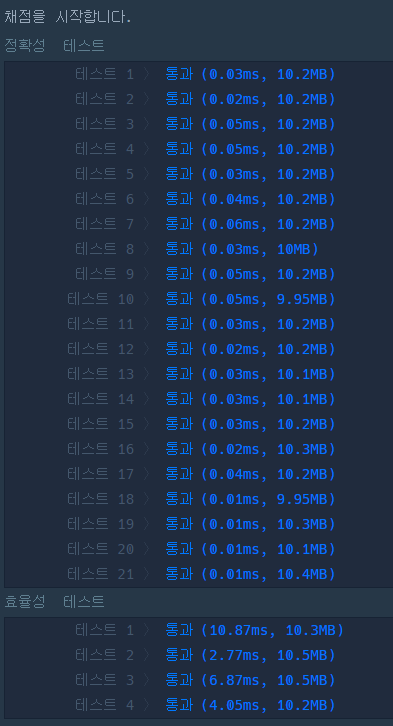

In [ ]:
from collections import deque

def solution(maps):
    n, m = len(maps), len(maps[0])
    visited = [[False]*m for _ in range(n)] # 방문했던 장소, history
    
    directions = [(1,0), (0,1), (-1,0), (0,-1)]

    queue = deque([(0,0,1)]) # (x, y, distance)
    visited[0][0] = True
    while queue:
        x, y, dist = queue.popleft()
        if x == n-1 and y == m-1: # 상대 진영 도착
            return dist
        
        for dx, dy in directions:
            nx, ny = x+dx, y+dy
            if 0 <= nx < n and 0 <= ny < m and maps[nx][ny] == 1 and not visited[nx][ny]:
                visited[nx][ny] = True
                queue.append((nx, ny, dist+1))
                
    return -1 # 도착할 수 없는 경우

### DFS

- 기본적인 방법을 적용했을 경우 -> 일부 문제를 틀렸으며, 런타임 문제 및 효율성 문제 발생

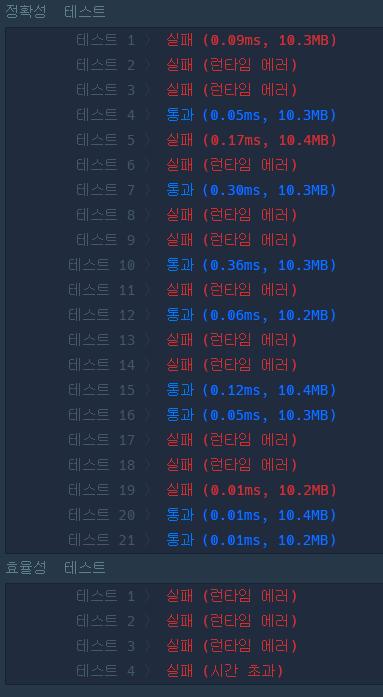

In [ ]:
def dfs(maps, visited, now, distance):
    if now == (n, m):
        return distance
    
    if distance >= visited.get(now, float('inf')):
        return float('inf')
    
    visited[now] = distance
    
    directions = [(1,0), (0,1), (-1,0), (0,-1)]
    min_distance = float('inf')
    for dx, dy in directions:
        nx, ny = now[0]+dx, now[1]+dy
        if 0 <= nx <= n and 0 <= ny <= m and maps[nx][ny] == 1 :
            min_distance = min(dfs(maps, visited, (nx, ny), distance+1), min_distance)
    return min_distance

def solution(maps):
    global n, m
    n, m = len(maps[0])-1, len(maps[1])-1
    now = (0,0)
    visited = {}
    min_visited = dfs(maps, visited, now, 1)
    return min_visited if min_visited != float('inf') else -1

- 코드를 개선해봤으나 여전히 효율성 기준을 달성하기 어려움

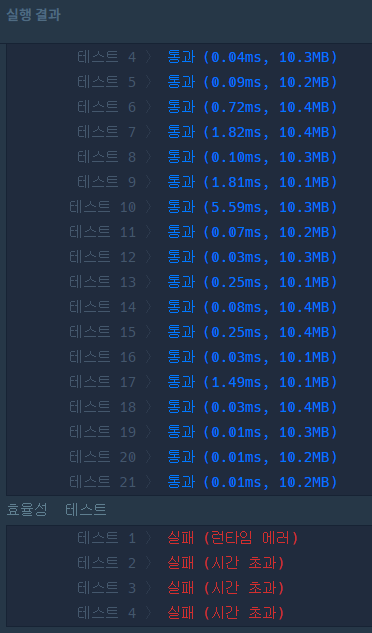

In [ ]:
def dfs(maps, x, y, visited, distance, max_dist):
    n, m = len(maps), len(maps[0])
    # 도착 지점에 도달한 경우, 현재 거리 반환
    if x == n-1 and y == m-1:
        return distance
    if distance > max_dist :
        return float('inf')
    
    directions = [(1, 0), (0, 1), (-1, 0), (0, -1)]
    min_distance = float('inf')

    for dx, dy in directions:
        nx, ny = x + dx, y + dy

        if 0 <= nx < n and 0 <= ny < m and maps[nx][ny] == 1 and distance < visited[nx][ny]:
            visited[nx][ny] = distance
            min_distance = min(min_distance, dfs(maps, nx, ny, visited, distance + 1, max_dist))

    return min_distance

def solution(maps):
    n, m = len(maps), len(maps[0])
    max_dist = sum([sum(x) for x in maps])
    visited = [[float('inf') for _ in range(m)] for _ in range(n)]
    visited[0][0] = 1  # 시작 지점 방문 처리

    min_distance = dfs(maps, 0, 0, visited, 1, max_dist)
    return min_distance if min_distance != float('inf') else -1


In [ ]:
maps = [[1,0,1,1,1],[1,0,1,0,1],[1,0,1,1,1],[1,1,1,0,1],[0,0,0,0,1]]
solution(maps)

11

In [ ]:
maps = [[1,0,1,1,1],[1,0,1,0,1],[1,0,1,1,1],[1,1,1,0,0],[0,0,0,0,1]]
solution(maps)

-1

## 깊이/너비 우선 탐색(DFS/BFS) > [네트워크](https://school.programmers.co.kr/learn/courses/30/lessons/43162)

### BFS

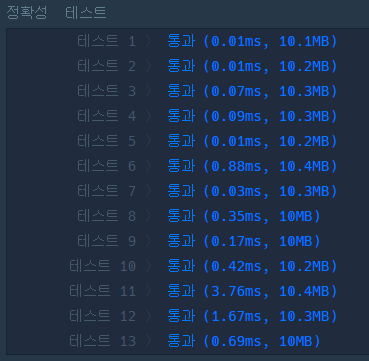

In [ ]:
from collections import deque

def solution(n, computers):
    visited = [False] * n

    # 독립된 컴퓨터 리스트
    alone = [i for i in range(n) if sum(computers[i]) == 1]
    
    if len(alone) == n: # 모든 컴퓨터가 독립인 경우
        return n
    
    for a in alone:  # 독립된 컴퓨터들을 방문 처리
        visited[a] = True

    # 독립된 컴퓨터를 제외한 네트워크 수 초기화
    network = len(alone) if alone else 0
    connected = [i for i in range(n) if sum(computers[i]) > 1]

    for c in connected:
        if not visited[c]:
            network += 1  # 새로운 네트워크 카운트
            queue = deque([c])
            while queue:
                com = queue.popleft()
                visited[com] = True
                for j in range(n):
                    if computers[com][j] == 1 and not visited[j]:
                        queue.append(j)
    
    return network


- 좀 더 간단한 코드

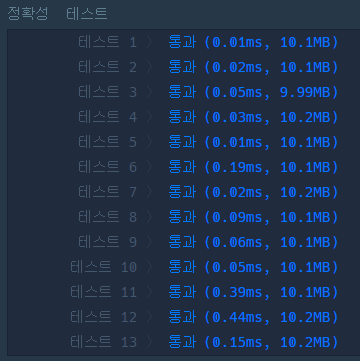

In [ ]:
from collections import deque

def solution(n, computers):
    visited = [False] * n
    network = 0
    
    for i in range(n):
        if not visited[i]:
            network += 1
            queue = deque([i])
            while queue:
                computer = queue.popleft()
                for j, isConnected in enumerate(computers[computer]):
                    if isConnected == 1 and not visited[j]:
                        visited[j] = True
                        queue.append(j)
    return network


### DFS로 풀어보기

In [ ]:
def dfs(computers, visited, start):
    stack = [start]
    while stack:
        j = stack.pop()
        if not visited[j]:
            visited[j] = True
            for i in range(len(computers)):
                if computers[j][i] == 1 and not visited[i]:
                    stack.append(i)

def solution(n, computers):
    visited = [False] * n
    network = 0
    for i in range(n):
        if not visited[i]:
            dfs(computers, visited, i)
            network += 1
    return network

In [ ]:
n = 3
computers = [[1, 1, 0], [1, 1, 0], [0, 0, 1]]
solution(n, computers)

2

In [ ]:
n = 3
computers = [[1, 1, 0], [1, 1, 1], [0, 1, 1]]
solution(n, computers)

1

In [ ]:
n = 3
computers = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
solution(n, computers)

3

In [ ]:
n = 5
computers = [[1, 1, 0, 0, 0], [1, 1, 0, 0, 0], [0, 0, 1, 1, 0], [0, 0, 1, 1, 0], [0,0,0,0,1]]
solution(n, computers)

3

## 깊이/너비 우선 탐색(DFS/BFS) > [단어 변환](https://school.programmers.co.kr/learn/courses/30/lessons/43163)

### BFS

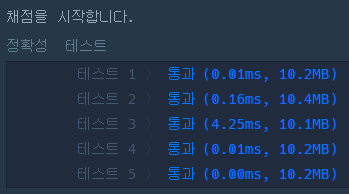

In [ ]:
from collections import deque

def one_different_words(word, word_list):
    diff_list = []
    for diff_word in word_list:
        diff_cnt = sum(w1 != w2 for w1, w2 in zip(word, diff_word))
        if diff_cnt == 1:
            diff_list.append(diff_word)
    return diff_list
        

def solution(begin, target, words):
    
    if target not in words:
        return 0
    current = (begin, 0)
    queue = deque([current])
    while queue :
        word, cnt = queue.popleft()
        diff_list = one_different_words(word, words) # 한 글자만 바꿔서 수정할 수 있는 단어 list up
        for diff in diff_list:
            if diff == target :
                return cnt + 1
            queue.append((diff, cnt+1))
    
    return 0

### DFS

In [ ]:
def one_different_words(word, word_list):
    diff_list = []
    for diff_word in word_list:
        diff_cnt = sum(w1 != w2 for w1, w2 in zip(word, diff_word))
        if diff_cnt == 1:
            diff_list.append(diff_word)
    return diff_list
        
def dfs(word, target, history, words, step):
    if word == target:
        return step
    if step >= history.get(word, float('inf')):
        return float('inf')
    
    history[word] = step  # 현재 단어와 단계를 기록
    min_step = float('inf')  # 각 호출마다 min_step을 초기화
    diff_list = one_different_words(word, words)
    
    for diff in diff_list:
        if diff not in history or step + 1 < history[diff]:  # 더 짧은 경로 발견 시 재귀 호출
            temp_step = dfs(diff, target, history, words, step+1)
            print(min_step, temp_step)
            min_step = min(min_step, temp_step)  # 현재 경로에서의 최소 단계 수 업데이트
    
    history[word] = min_step  # 최소 단계 수를 history에 업데이트
    return min_step

def solution(begin, target, words):
    if target not in words:
        return 0
    step = 0
    history = {}
    min_step = dfs(begin, target, history, words, step)

    return min_step if min_step != float('inf') else 0 


In [ ]:
def one_different_words(word, word_list):
    diff_list = []
    for diff_word in word_list:
        diff_cnt = sum(w1 != w2 for w1, w2 in zip(word, diff_word))
        if diff_cnt == 1:
            diff_list.append(diff_word)
    return diff_list
        
def dfs(word, target, history, words, step):
    if word == target:
        return step
    if step >= history.get(word, float('inf')):
        return float('inf')
    
    diff_list = one_different_words(word, words)
    for diff in diff_list:
        if diff not in history.keys():
            min_step = min(dfs(diff, target, history, words, step+1), history.get(diff, float('inf')))
            history[diff] = min_step
    return min_step

def solution(begin, target, words):
    if target not in words :
        return 0
    step = 0
    history = {}
    min_step = dfs(begin, target, history, words, step)
    return min_step

In [ ]:
begin = 'hit'
target = 'cog'
words = ["hot", "dot", "dog", "lot", "log", "cog"]

solution(begin, target, words)

inf inf
inf 5
inf 5
5 4
inf 4
inf 5
inf 5
4 5
inf 4
inf inf
inf 4
inf 4
4 4
inf 4


4

In [ ]:
begin = 'hit'
target = 'cog'
words = ["hot", "dot", "dog", "lot", "log"]

solution(begin, target, words)

0

## 깊이/너비 우선 탐색(DFS/BFS) > [아이템 줍기](https://school.programmers.co.kr/learn/courses/30/lessons/87694)

### BFS

- ㄷ자로 겹칠 경우, 우회해서 가는게 아닌 가로질러 가는 문제를 해결하기 위해 2배로 scale해서 전체 과정을 작업
- 2배 스케일로 작업한 뒤, 최종 거리를 전달하는 경우에만 2로 나눠서 전달

In [ ]:
from collections import deque

def solution(rectangle, characterX, characterY, itemX, itemY):
    # 좌표 스케일링 조정
    characterX, characterY, itemX, itemY = characterX*2, characterY*2, itemX*2, itemY*2
    
    max_x = max([x2 for x1, y1, x2, y2 in rectangle]) * 2
    max_y = max([y2 for x1, y1, x2, y2 in rectangle]) * 2
    maps = [[0] * (max_x + 1) for _ in range(max_y + 1)]
    visited = [[False] * (max_x + 1) for _ in range(max_y + 1)]

    for rect in rectangle:
        x1, y1, x2, y2 = [x*2 for x in rect]
        for i in range(x1, x2 + 1):
            for j in range(y1, y2 + 1):
                if i in [x1, x2] or j in [y1, y2]:
                    if maps[j][i] != -1:  # 테두리는 1로 설정
                        maps[j][i] = 1
                else:
                    maps[j][i] = -1  # 내부는 -1로 설정하여 경로에서 제외

    queue = deque([(characterX, characterY, 0)])  # x, y, distance
    directions = [(1, 0), (0, 1), (-1, 0), (0, -1)]

    while queue:
        x, y, distance = queue.popleft()
        if (x, y) == (itemX, itemY):
            return distance // 2  # 원래 스케일로 복귀
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx <= max_x and 0 <= ny <= max_y and maps[ny][nx] == 1 and not visited[ny][nx]:
                visited[ny][nx] = True
                queue.append((nx, ny, distance + 1))
    return -1


In [ ]:
rectangle = [[1, 1, 4, 4], [2, 2, 5, 5], [3, 3, 7, 8]]
characterX, characterY = 1, 1
itemX, itemY = 5, 3

solution(rectangle, characterX, characterY, itemX, itemY)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


6

In [ ]:
rectangle = [[1, 1, 8, 4], [2, 2, 4, 9], [3, 6, 9, 8], [6, 3, 7, 7]]
characterX, characterY = 9, 7
itemX, itemY = 6, 1

solution(rectangle, characterX, characterY, itemX, itemY)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 1, 0, 0, 0,

11

In [ ]:
rectangle = [[1,1,7,4],[3,2,5,5],[4,3,6,9],[2,6,8,8]]
characterX, characterY = 1, 3
itemX, itemY = 7, 8

solution(rectangle, characterX, characterY, itemX, itemY)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 

17

In [ ]:
rectangle = [[1,1,7,4],[3,2,5,5],[4,3,6,9],[2,6,8,8]]
characterX, characterY = 1, 3
itemX, itemY = 7, 8

solution(rectangle, characterX, characterY, itemX, itemY)

8 9
[[0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 1, 1, 1, 1, 0], [0, 1, -1, -1, -1, -1, -1, 0], [0, 1, -1, -1, -1, -1, -1, 0], [0, 0, 0, 1, -1, -1, 0, 0], [0, 0, 0, 0, 1, -1, 0, 0], [0, 0, 1, 1, -1, -1, 1, 1], [0, 0, 1, -1, -1, -1, -1, -1], [0, 0, 0, 0, 1, -1, 0, 0]]


## 깊이/너비 우선 탐색(DFS/BFS) > [여행경로](https://school.programmers.co.kr/learn/courses/30/lessons/43164)

### 간단히 내장함수만 이용

- 기본적인 python 내장함수 위주로 구현
- 이렇게 했을 경우, 모든 여행경로를 순환하지 못하는 경우로 빠졌을 때 backtracking하지 못함 -> 이건 사실 문제 설명이 조금 애매한 부분이 있음
- 이를 backtracking하기 위해선 결국 dfs/bfs 쪽으로 가야할듯

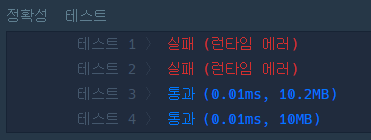

In [3]:
def solution(tickets):
    now = 'ICN'
    visited = [now]
    total = len(tickets)+1
    while len(visited) < total:
        next_list = sorted([x for x in tickets if x[0]==now], key=lambda x: x[1])
        print(visited, now, next_list)
        ticket = next_list[0]
        tickets.remove(ticket)
        now = ticket[1]
        visited.append(now)
    return visited

In [ ]:
a = [1,2]
b = a.copy()
b.remove(1)
a, b

([1, 2], [2])

### BFS

In [13]:
from collections import deque

def solution(tickets):
    visited = deque([(['ICN'], tickets)]) # visited airplane, tickets
    while visited:
        visit_place, remain_tickets = visited.popleft()
        if not remain_tickets:
            return visit_place
        now = visit_place[-1]
        next_place = sorted([x for x in remain_tickets if x[0]==now], key=lambda x : x[1])
        if next_place :
            for place in next_place:
                list_copy = remain_tickets.copy()
                list_copy.remove(place)
                visited.append((visit_place+[place[1]], list_copy))

In [15]:
tickets = [["ICN", "D"], ["D", "ICN"], ["ICN", "B"]]
solution(tickets)

['ICN', 'D', 'ICN', 'B']

### DFS

In [18]:
def dfs(now, remain_tickets, path):
    # 모든 티켓 사용 시 현재까지의 경로 반환
    if not remain_tickets:
        return path
    
    for i, (src, dst) in enumerate(remain_tickets):
        if src == now:  # 현재 위치에서 출발하는 티켓 찾기
            next_path = dfs(dst, remain_tickets[:i] + remain_tickets[i+1:], path + [dst])
            if next_path:  # 유효한 경로를 찾은 경우
                return next_path

def solution(tickets):
    tickets.sort(key=lambda x: x[1])  # 알파벳 순으로 미리 정렬
    return dfs('ICN', tickets, ['ICN'])


In [19]:
tickets = [["ICN", "D"], ["D", "ICN"], ["ICN", "B"]]
solution(tickets)

['ICN', 'D', 'ICN', 'B']

In [ ]:
tickets = [["ICN", "SFO"], ["ICN", "ATL"], ["SFO", "ATL"], ["ATL", "ICN"], ["ATL","SFO"]]
solution(tickets)

In [ ]:
tickets =  [["ICN", "SFO"], ["SFO", "ICN"], ["ICN", "SFO"], ["SFO", "QRE"]]
solution(tickets)